In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [97]:
data = pd.read_csv("Final_dataset.csv")

In [98]:
X = data.drop(columns=['target']).values
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree

In [99]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [100]:
y_pred = decision_tree.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5247
           1       0.95      0.93      0.94      4753

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Logistic Regression

In [101]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5247
           1       0.89      0.88      0.89      4753

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



c:\Users\VASU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest

In [102]:
random_forest = RandomForestClassifier(n_estimators = 100) 
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5247
           1       0.95      0.94      0.94      4753

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.95     10000
weighted avg       0.95      0.95      0.95     10000



Prediction as you like


In [103]:
import cv2
import matplotlib.pyplot as plt

def get_image_fight(pokemon_id_1, pokemon_id_2,pokemon):
    k = pokemon.loc[pokemon_id_1 - 1, 'Name']
    a = pokemon.loc[pokemon_id_2 - 1, 'Name']
    path = 'Pokemon Dataset'
    l1 = cv2.imread(path+f"/{k}.png")
    l2 = cv2.imread(path+f"/{a}.png")
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(l1)
    axes[0].axis('off')
    axes[0].set_title(f'{k} (pokemon 1)')
    axes[1].imshow(l2) 
    axes[1].axis('off') 
    axes[1].set_title(f'{a} (pokemon 2)')
    plt.show()

def winner(pokemon_id_1,pokemon):
    k = pokemon.loc[pokemon_id_1 - 1, 'Name']
    path = 'Pokemon Dataset'
    l = cv2.imread(path+f"/{k}.png")
    
    plt.imshow(l) 
    plt.axis('off') 
    plt.title(f'{k} (Winner)')
    plt.show()

In [104]:
using = pd.read_csv("useful.csv")
def get_features(pokemon_id,pokemon):
    return (pokemon.iloc[pokemon_id - 1, 0::1])


def rename_column(first_or_second, features):
     list_ = features.columns.to_list()
     if first_or_second:
          for i in range(len(list_)):
               list_[i] = 'First_' + list_[i] 

     else:
          for i in range(len(list_)):
               list_[i] = 'Second_' + list_[i] 

     features.columns = list_
first_pokemon = using.copy()
rename_column(True, first_pokemon)
second_pokemon = using.copy()
rename_column(False, second_pokemon)

In [105]:
pokemon = pd.read_csv("pokemon_data.csv")
def predictions_no_image(pokemon_id_1, pokemon_id_2,pokemon,using, model):
    # get_image_fight(pokemon_id_1, pokemon_id_2,pokemon)
    k = pokemon.loc[pokemon_id_1 - 1, 'Name']
    a = pokemon.loc[pokemon_id_2 - 1, 'Name']
    print(f"The match is between {k} and {a}")
    first_pokemon = using.copy()
    rename_column(True, first_pokemon)
    second_pokemon = using.copy()
    rename_column(False, second_pokemon)
    l1 = get_features(pokemon_id_1, first_pokemon).to_frame().T
    l1.reset_index(drop= True, inplace= True)
    l2 = get_features(pokemon_id_2, second_pokemon).to_frame().T
    l2.reset_index(drop = True, inplace= True)
    l1.drop('First_#', axis = 1, inplace=True)
    l2.drop('Second_#', axis = 1, inplace=True)
    test_df = pd.concat([l1, l2], axis=1)
    y_pred = model.predict(test_df)
    if y_pred == 1:
        # winner(pokemon_id_1,pokemon)
        print(f"Winner is {k}")
    else:
        # winner(pokemon_id_2,pokemon)
        print(f"Winner is ## {a} ##")

In [106]:
predictions_no_image(109, 100, pokemon, using, logreg)

The match is between Voltorb and Gastly
Winner is Voltorb


c:\Users\VASU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [107]:
pokemon = pd.read_csv("pokemon_data.csv")
def predictions(pokemon_id_1, pokemon_id_2,pokemon,using, model):
    get_image_fight(pokemon_id_1, pokemon_id_2,pokemon)
    first_pokemon = using.copy()
    rename_column(True, first_pokemon)
    second_pokemon = using.copy()
    rename_column(False, second_pokemon)
    l1 = get_features(pokemon_id_1, first_pokemon).to_frame().T
    l1.reset_index(drop= True, inplace= True)
    l2 = get_features(pokemon_id_2, second_pokemon).to_frame().T
    l2.reset_index(drop = True, inplace= True)
    l1.drop('First_#', axis = 1, inplace=True)
    l2.drop('Second_#', axis = 1, inplace=True)
    test_df = pd.concat([l1, l2], axis=1)
    y_pred = model.predict(test_df)
    if y_pred == 1:
        winner(pokemon_id_1,pokemon)
    else:
        winner(pokemon_id_2,pokemon)
    

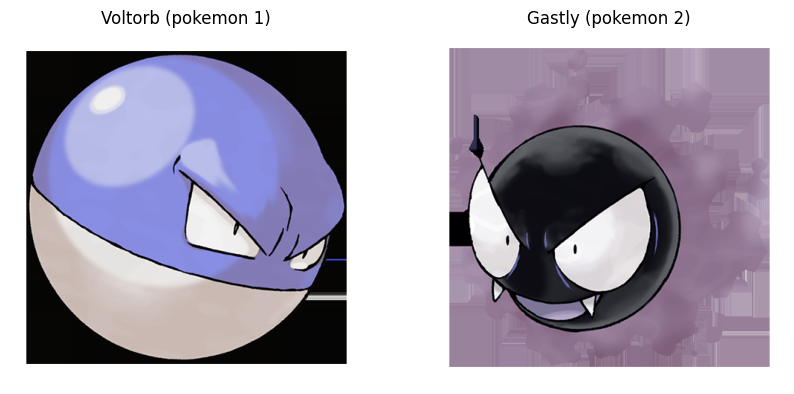

c:\Users\VASU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


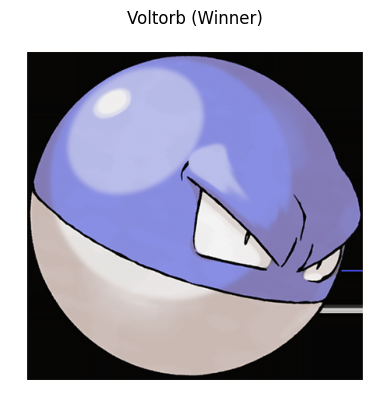

In [108]:
predictions(109, 100, pokemon, using, logreg) # The mega Pokemon are present in the dataset of images, so if a mega pokemon comes up, there might be an error